In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset-20250701T143558Z-1-001.zip'
extract_to = '/content/drive/MyDrive/TB KECERDASAN BUATAN'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File berhasil diekstrak ke: {extract_to}")

File berhasil diekstrak ke: /content/drive/MyDrive/TB KECERDASAN BUATAN


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

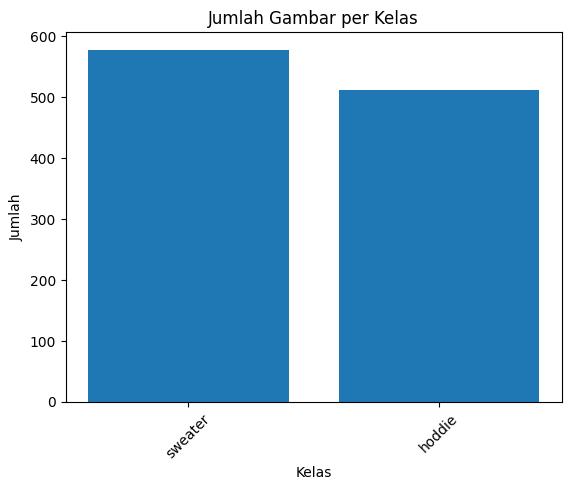

In [ ]:
import os
import matplotlib.pyplot as plt

class_counts = {}
base_path = '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset/bahan'

for class_name in os.listdir(base_path):
    class_dir = os.path.join(base_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()


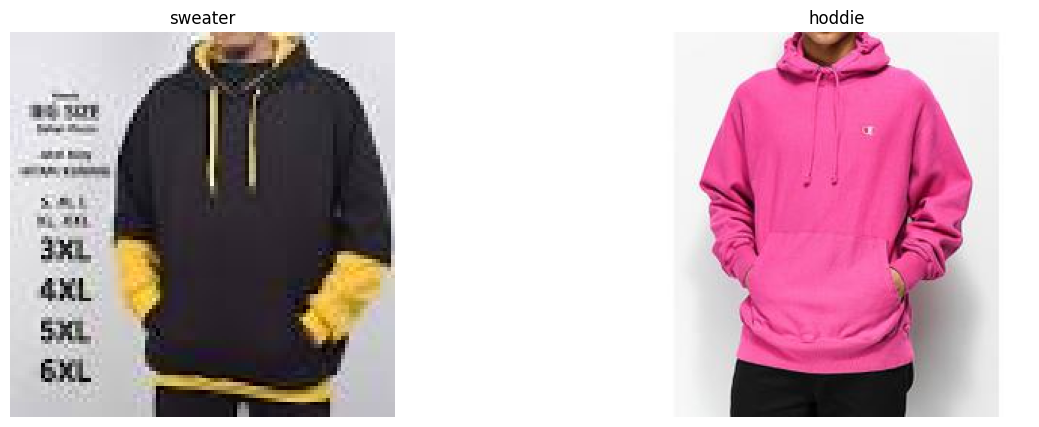

In [ ]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(1, len(class_counts), figsize=(15, 5))
for ax, class_name in zip(axes, class_counts):
    folder = os.path.join(base_path, class_name)
    img_file = os.listdir(folder)[0]  # ambil gambar pertama
    img_path = os.path.join(folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')
plt.show()

In [ ]:
data_path = '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset/bahan'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 864 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/UTS/best_model.h5', save_best_only=True)
]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=train_generator.classes
)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
image_size = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=image_size),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3)
]

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=image_size),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 60

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/60
 5/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4816 - loss: 0.7130

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 6/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4794 - loss: 0.7170

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4876 - loss: 0.7192

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4893 - loss: 0.7187

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/27 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4905 - loss: 0.7182

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4938 - loss: 0.7166

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4989 - loss: 0.7141

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5087 - loss: 0.7095

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5169 - loss: 0.7058

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5195 - loss: 0.7047 - val_accuracy: 0.8233 - val_loss: 0.5571 - learning_rate: 1.0000e-04
Epoch 2/60
 8/27 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7300 - loss: 0.5698

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7408 - loss: 0.5646

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7436 - loss: 0.5632

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7518 - loss: 0.5585

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7537 - loss: 0.5578

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7572 - loss: 0.5562

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7645 - loss: 0.5504

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7679 - loss: 0.5465 - val_accuracy: 0.8186 - val_loss: 0.4169 - learning_rate: 1.0000e-04
Epoch 3/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 1/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6875 - loss: 0.5594

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7657 - loss: 0.4984

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/27 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7712 - loss: 0.4961

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7723 - loss: 0.4966

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7704 - loss: 0.5044

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/27 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7727 - loss: 0.5034 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7750 - loss: 0.5009

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7768 - loss: 0.4985 - val_accuracy: 0.8512 - val_loss: 0.3832 - learning_rate: 1.0000e-04
Epoch 4/60
 1/27 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7500 - loss: 0.4984

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 2/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7344 - loss: 0.5436

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7311 - loss: 0.5497

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7494 - loss: 0.5418

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7573 - loss: 0.5347

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7626 - loss: 0.5290

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7708 - loss: 0.5208

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7756 - loss: 0.5152

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7770 - loss: 0.5135

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7783 - loss: 0.5118

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7822 - loss: 0.5066 - val_accuracy: 0.8279 - val_loss: 0.3721 - learning_rate: 1.0000e-04
Epoch 5/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8366 - loss: 0.4157

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8216 - loss: 0.4429

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8195 - loss: 0.4476

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8183 - loss: 0.4508

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8170 - loss: 0.4528

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8160 - loss: 0.4523

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8172 - loss: 0.4481

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8172 - loss: 0.4443

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8173 - loss: 0.4419 - val_accuracy: 0.8000 - val_loss: 0.3928 - learning_rate: 1.0000e-04
Epoch 6/60
 3/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8090 - loss: 0.4552 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8158 - loss: 0.4446

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8245 - loss: 0.4296

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8249 - loss: 0.4292

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8289 - loss: 0.4173

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8282 - loss: 0.4148

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/27 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8260 - loss: 0.4157 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8255 - loss: 0.4163

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8252 - loss: 0.4172

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8239 - loss: 0.4205 - val_accuracy: 0.8047 - val_loss: 0.4213 - learning_rate: 1.0000e-04
Epoch 7/60
 1/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8125 - loss: 0.4311

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 2/27 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8203 - loss: 0.4224

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 5/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8194 - loss: 0.4207

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 6/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8217 - loss: 0.4190

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8208 - loss: 0.4195

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/27 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8216 - loss: 0.4195

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8275 - loss: 0.4161

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8282 - loss: 0.4150

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8294 - loss: 0.4126

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8309 - loss: 0.4102

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8315 - loss: 0.4091 - val_accuracy: 0.8791 - val_loss: 0.3246 - learning_rate: 1.0000e-04
Epoch 8/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 2/27 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7812 - loss: 0.5152

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8279 - loss: 0.4188

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8335 - loss: 0.4089

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8381 - loss: 0.4014

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8424 - loss: 0.3974

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8436 - loss: 0.3960

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8445 - loss: 0.3953

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8461 - loss: 0.3930

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8456 - loss: 0.3935 - val_accuracy: 0.9023 - val_loss: 0.3029 - learning_rate: 1.0000e-04
Epoch 9/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8228 - loss: 0.4680

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8243 - loss: 0.4609

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8256 - loss: 0.4504

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8250 - loss: 0.4478

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8252 - loss: 0.4445

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8258 - loss: 0.4398

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8262 - loss: 0.4381

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8271 - loss: 0.4336 - val_accuracy: 0.8372 - val_loss: 0.3395 - learning_rate: 1.0000e-04
Epoch 10/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 1/27 ━━━━━━━━━━━━━━━━━━━━ 12:53 30s/step - accuracy: 0.6875 - loss: 0.5144

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 3/27 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7865 - loss: 0.4128

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 6/27 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8147 - loss: 0.3877

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/27 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8351 - loss: 0.3713

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8394 - loss: 0.3713

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8404 - loss: 0.3715

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8411 - loss: 0.3714

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8414 - loss: 0.3719

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8441 - loss: 0.3732 - val_accuracy: 0.8884 - val_loss: 0.3154 - learning_rate: 1.0000e-04
Epoch 11/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7865 - loss: 0.4379

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8389 - loss: 0.3574

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8403 - loss: 0.3550

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8413 - loss: 0.3540

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8426 - loss: 0.3527

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8434 - loss: 0.3526

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8435 - loss: 0.3531

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8433 - loss: 0.3546

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8432 - loss: 0.3551

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8436 - loss: 0.3557 - val_accuracy: 0.8279 - val_loss: 0.3890 - learning_rate: 1.0000e-04
Epoch 12/60
 3/27 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8281 - loss: 0.4517

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8359 - loss: 0.4302

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 5/27 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8438 - loss: 0.4163

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8479 - loss: 0.4025

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8498 - loss: 0.3979

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8503 - loss: 0.3949

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/27 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8506 - loss: 0.3929

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8530 - loss: 0.3843

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8544 - loss: 0.3798

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8554 - loss: 0.3743 - val_accuracy: 0.9070 - val_loss: 0.2967 - learning_rate: 5.0000e-05
Epoch 13/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8034 - loss: 0.4312

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8126 - loss: 0.4173

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8251 - loss: 0.3914

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8259 - loss: 0.3901

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8276 - loss: 0.3863

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8297 - loss: 0.3827

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8322 - loss: 0.3797

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8331 - loss: 0.3786

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8355 - loss: 0.3758 - val_accuracy: 0.9163 - val_loss: 0.2903 - learning_rate: 5.0000e-05
Epoch 14/60
 1/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9375 - loss: 0.2504

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9012 - loss: 0.3236

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8994 - loss: 0.3278

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8955 - loss: 0.3315

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/27 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8952 - loss: 0.3312

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8927 - loss: 0.3344

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8916 - loss: 0.3356

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8907 - loss: 0.3361

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8858 - loss: 0.3397

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8844 - loss: 0.3404

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8826 - loss: 0.3413 - val_accuracy: 0.8791 - val_loss: 0.3166 - learning_rate: 5.0000e-05
Epoch 15/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 3/27 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8872 - loss: 0.3116

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 6/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8884 - loss: 0.3007

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8823 - loss: 0.3115

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8761 - loss: 0.3184

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/27 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8717 - loss: 0.3231

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8703 - loss: 0.3246

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/27 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8671 - loss: 0.3275 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8659 - loss: 0.3298 - val_accuracy: 0.9256 - val_loss: 0.2810 - learning_rate: 5.0000e-05
Epoch 16/60
 3/27 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8351 - loss: 0.3802

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 5/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8429 - loss: 0.3631

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 6/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8431 - loss: 0.3581

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 8/27 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8436 - loss: 0.3509

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8530 - loss: 0.3320

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8540 - loss: 0.3306

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8551 - loss: 0.3290

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8575 - loss: 0.3253

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/27 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8577 - loss: 0.3253 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8585 - loss: 0.3249

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8592 - loss: 0.3251 - val_accuracy: 0.9023 - val_loss: 0.3137 - learning_rate: 5.0000e-05
Epoch 17/60
 3/27 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9201 - loss: 0.2396

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/27 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8883 - loss: 0.2963

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8869 - loss: 0.2992

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8795 - loss: 0.3091

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8776 - loss: 0.3113

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8762 - loss: 0.3129

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8739 - loss: 0.3156

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8729 - loss: 0.3168

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8703 - loss: 0.3201 - val_accuracy: 0.8930 - val_loss: 0.3101 - learning_rate: 5.0000e-05
Epoch 18/60
 2/27 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8594 - loss: 0.3162

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 4/27 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8704 - loss: 0.3055

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


17/27 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8682 - loss: 0.3150

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/27 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8676 - loss: 0.3162

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8666 - loss: 0.3183

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/27 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8657 - loss: 0.3208 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8653 - loss: 0.3217

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8649 - loss: 0.3230

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8646 - loss: 0.3242 - val_accuracy: 0.9023 - val_loss: 0.3128 - learning_rate: 5.0000e-05
Epoch 19/60
 6/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9020 - loss: 0.2919

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 7/27 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8988 - loss: 0.2955

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 9/27 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8939 - loss: 0.2996

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8910 - loss: 0.3000

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8874 - loss: 0.3026

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/27 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8872 - loss: 0.3031

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/27 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8864 - loss: 0.3052

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/27 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8859 - loss: 0.3061

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8838 - loss: 0.3094 - val_accuracy: 0.9163 - val_loss: 0.2838 - learning_rate: 2.5000e-05
Epoch 20/60


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 1/27 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7812 - loss: 0.3828

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/27 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8585 - loss: 0.3209

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


14/27 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8641 - loss: 0.3185

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/27 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8655 - loss: 0.3180

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/27 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8665 - loss: 0.3189

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/27 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8697 - loss: 0.3186

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/27 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8717 - loss: 0.3176

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8731 - loss: 0.3170

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8728 - loss: 0.3184 - val_accuracy: 0.9163 - val_loss: 0.2819 - learning_rate: 2.5000e-05


In [ ]:
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 697ms/step
Classification Report:
              precision    recall  f1-score   support

      hoddie       0.93      0.87      0.90       102
     sweater       0.89      0.94      0.91       113

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215

Confusion Matrix:
[[ 89  13]
 [  7 106]]


In [ ]:
try:
    if len(class_labels) == 2:
        auc = roc_auc_score(true_classes, predictions[:,1])
        print("AUC-ROC:", auc)
    else:
        print("AUC-ROC hanya bisa dihitung untuk 2 kelas.")
except:
    print("AUC-ROC gagal dihitung.")

AUC-ROC: 0.9605240326218983


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset-20250701T143558Z-1-001.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os


zip_path = '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset-20250701T143558Z-1-001.zip'

# Folder tujuan ekstraksi
extract_to = '/content/drive/MyDrive/TB KECERDASAN BUATAN'

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File berhasil diekstrak ke: {extract_to}")

File berhasil diekstrak ke: /content/drive/MyDrive/TB KECERDASAN BUATAN


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalisasi pixel gambar
    rotation_range=20,        # Rotasi gambar acak
    width_shift_range=0.2,    # Pergeseran lebar gambar
    height_shift_range=0.2,   # Pergeseran tinggi gambar
    shear_range=0.2,          # Shear intensity
    zoom_range=0.2,           # Zoom gambar acak
    horizontal_flip=True,     # Flip horizontal
    validation_split=0.2      # Membagi data training dan validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset/bahan', # Changed path to the correct location of your extracted images
    target_size=(150, 150),     # Resize semua gambar menjadi 150x150
    batch_size=32,
    class_mode='categorical',   # Karena klasifikasi multi-kelas
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/TB KECERDASAN BUATAN/dataset/bahan', # Changed path to the correct location of your extracted images
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 864 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 762ms/step


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

Confusion Matrix:
[[  0 102]
 [  1 112]]


Saving foto2.jpg to foto2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


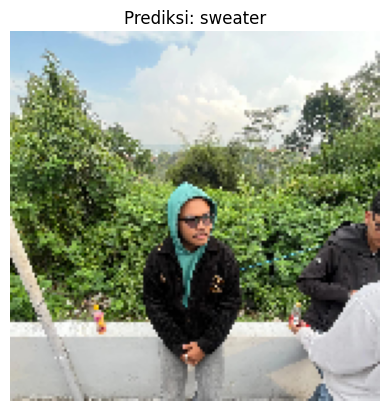

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files  # Import the files module

uploaded = files.upload()
for img_path in uploaded.keys():
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f'Prediksi: {predicted_class}')
    plt.axis('off')
    plt.show()